# Initial sea ice diagnostics

In [1]:
import sys
sys.path.append("../")
from    seaice_class import SeaIceExtent

FDB5 binary library not present on system, disabling FDB support.


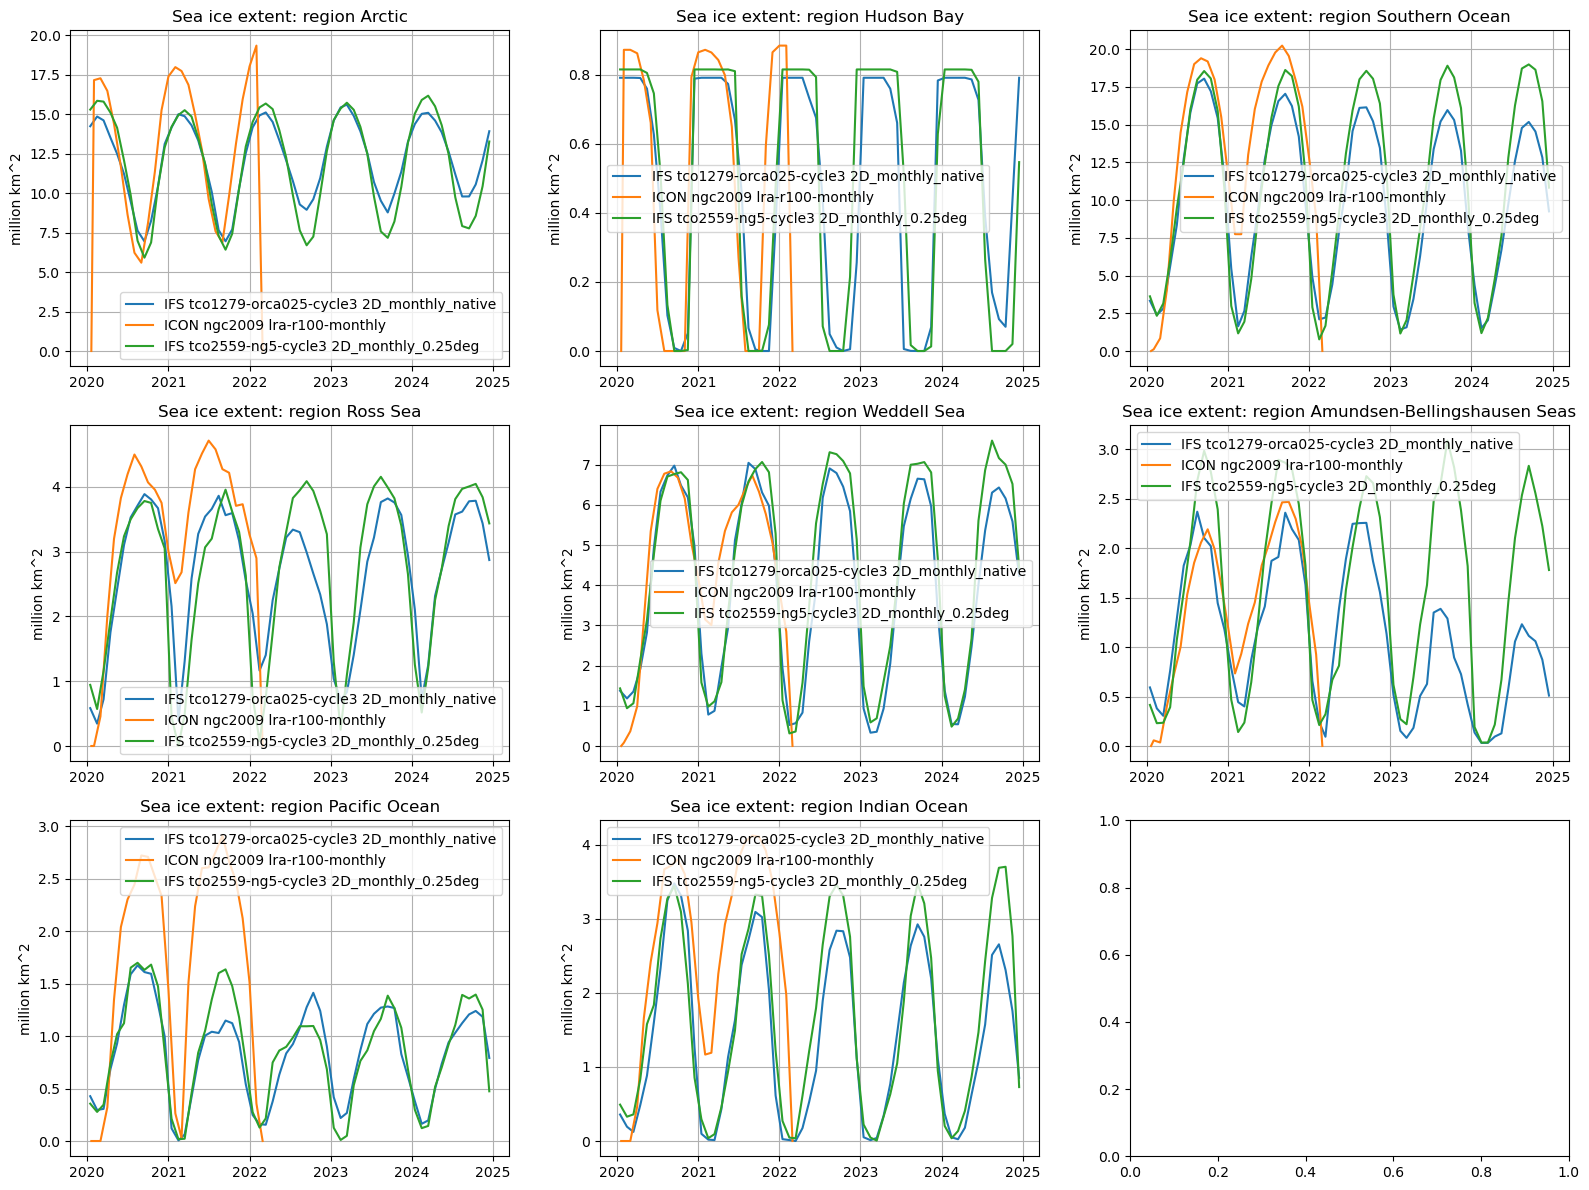

In [2]:
diagnostic = SeaIceExtent()

# Setups to be included in the comparison

#            model      exp                          source
mySetups = [
            ["IFS",     "tco1279-orca025-cycle3",   "2D_monthly_native"     ],
            ["ICON",    "ngc2009",                  "lra-r100-monthly"      ],
            ["IFS",     "tco2559-ng5-cycle3",       "2D_monthly_0.25deg"    ],
           ]

# List of regions where SIE has to be calculated
myRegions = ["Arctic", "Hudson Bay", "Southern Ocean", "Ross Sea", "Weddell Sea", "Amundsen-Bellingshausen Seas", "Pacific Ocean", "Indian Ocean"]

# Run diagnostic
diagnostic.run(mySetups = mySetups, myRegions = myRegions)
